In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
cf = pd.read_pickle("../model/random_forest_confusionmatrix.pickle")

In [24]:
sns.set(style="ticks", context="talk", rc={'figure.figsize':(10.0,8.00)})
plt.style.use("dark_background")

In [25]:
#sns.set(rc={'figure.figsize':(10.0,8.00)})

In [26]:
sns.set_context("talk")

In [27]:
#colormap = sns.color_palette("rocket_r", as_cmap=True)
#colormap = sns.color_palette("YlOrBr", as_cmap=True)
#colormap = sns.color_palette("vlag", as_cmap=True)
#colormap = sns.color_palette("light:b", as_cmap=True)
colormap = sns.color_palette("magma", as_cmap=True)

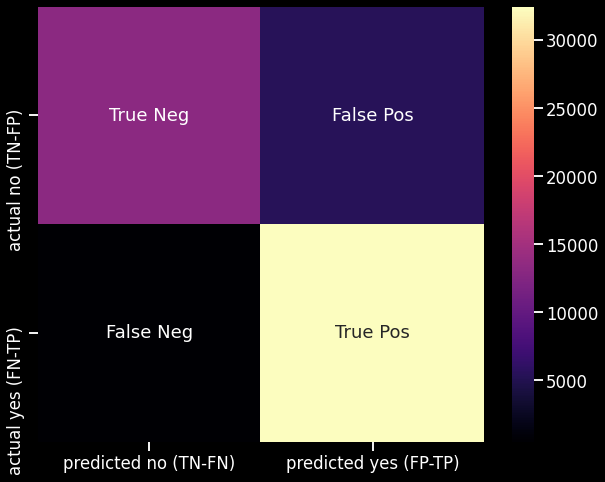

In [28]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
plot = sns.heatmap(cf, annot=labels, fmt='', cmap=colormap)

In [29]:
fig = plot.get_figure()
fig.savefig("../model/random_forest_confusion_matrix_v3.png")

In [30]:
roc = pd.read_pickle("../model/random_forest_roc_cords.pickle")

In [31]:
roc

,x,y
0,0.000000,0.000000
1,0.000000,0.094732
2,0.000000,0.148960
3,0.000054,0.204524
4,0.000054,0.230302
...,...,...
3924,0.844677,1.000000
3925,0.865806,1.000000
3926,0.884086,1.000000
3927,0.924570,1.000000


In [32]:
#dfauc = pd.DataFrame(data=rf_auc)
f = open("../model/random_forest_auc.txt", "r")
auc_score = float(f.read())
auc_score

0.8455870393133429

In [33]:
df_metric = pd.read_pickle("../model/random_forest_metric.pickle")

In [34]:
df_metric

,rf_fpr,rf_tpr,rf_thresholds
0,0.000000,0.000000,1.986485
1,0.000000,0.094732,0.986485
2,0.000000,0.148960,0.986451
3,0.000054,0.204524,0.986244
4,0.000054,0.230302,0.986210
...,...,...,...
3924,0.844677,1.000000,0.008372
3925,0.865806,1.000000,0.005976
3926,0.884086,1.000000,0.005453
3927,0.924570,1.000000,0.003542


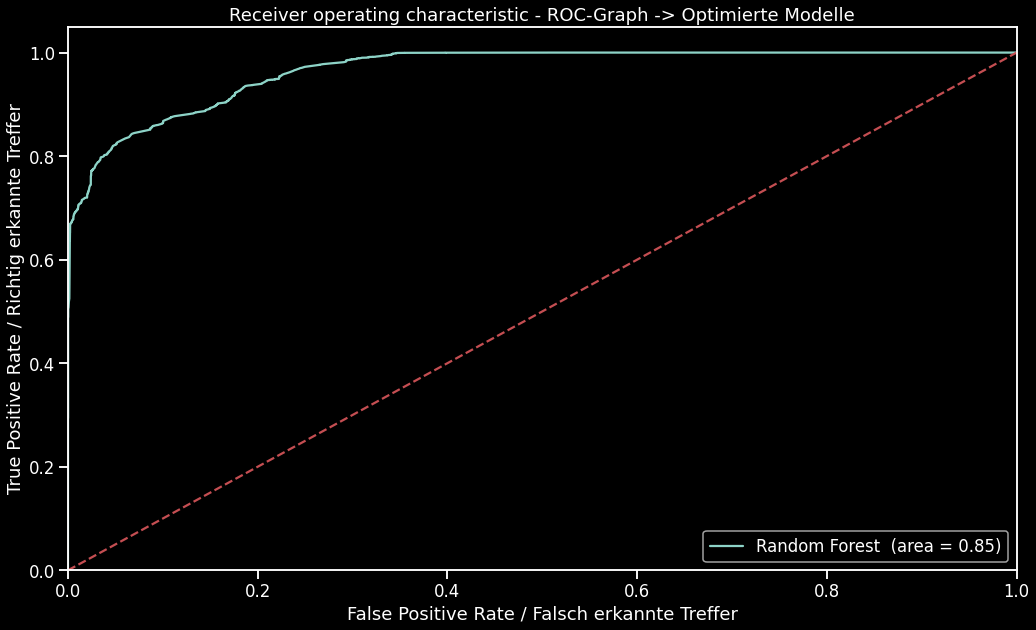

In [35]:
plt.figure(figsize=(17,10))
#fpr, tpr, thresholds = roc_curve(ynew_test, my_models[i].predict_proba(xnew_test)[:,1])
#fpr_array.append(fpr)
#tpr_array.append(tpr)
#thresholds_array.append(thresholds)
plt.plot(df_metric.rf_fpr.values, df_metric.rf_tpr.values, label='Random Forest '+' (area = %0.2f)' % auc_score)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
plt.title('Receiver operating characteristic - ROC-Graph -> Optimierte Modelle')
plt.legend(loc="lower right")
plt.savefig('../model/random_forest_roccurve')
plt.show()

In [ ]:
plt.figure(figsize=(17,10))
for i in range(len(my_models)):
    rf_roc_auc_array.append(roc_auc_score(ynew_test, my_models[i].predict(xnew_test)))
    fpr, tpr, thresholds = roc_curve(ynew_test, my_models[i].predict_proba(xnew_test)[:,1])
    fpr_array.append(fpr)
    tpr_array.append(tpr)
    thresholds_array.append(thresholds)
    plt.plot(fpr, tpr, label=my_models_name[i]+' (area = %0.2f)' % rf_roc_auc_array[i])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
plt.title('Receiver operating characteristic - ROC-Graph -> Optimierte Modelle')
plt.legend(loc="lower right")
plt.savefig('RF_ROC_opti3')
plt.show()